# Airline Industry: Risk Assessment

In [1]:
from PIL import Image
fig1 = Image.open('images/plane1.jpg')
display(fig1)

## Overview

This project analyses an aviation accident dataset from the National Transportation Safety Board which contains information about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters. We analyze this data to conclude which make and model are recommendaded, i.e. have lower risk of getting into an accident where the plane is damaged and people are injured for new commercial and private enterprises.

## Business Problem

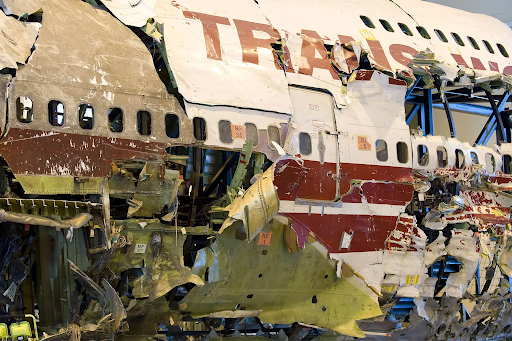

In [2]:
fig1 = Image.open('images/plane_destroyed.png')
display(fig1)

Analyzing the data contaimed in this dataset can allow us understand what are the best features that correlate with a lower risk of buying an aircraft for our enterprises. A lower risk includes both a lower chance of damaging the aircraft and injurying a passenger or flight worker. This analyze allow us to not only promote safer travels, but also prevents the company from going bankrupt after incidents that hurt clients, like TWA, featured above. We describe our data cleaning process, filters we use to and our commendations.

## Data Understanding

In [3]:
fig1 = Image.open('images/plane2.jpeg')
display(fig1)

The National Transportation Safety Board  provides information starting from 1948 and has almost 90 thousand entries of aviation accident. Every accident gets tagged with ID, dates, location, weather, report status, number of people injured and many other features that can help us understand the cause and consequence of what happened.

We are interested in minimizing the number of accidents in order to minimize passengers getting injured.

In [4]:
#We import useful packages for this project
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Avoiding lengthy warnings
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=(SettingWithCopyWarning))

%matplotlib inline

In [5]:
#We read the csv file containing the data and rename columns/features to be more readable
pd.set_option('display.max_columns',100)
df = pd.read_csv('data/AviationData.csv', encoding='latin1', low_memory='False')
#Makes columns easier to read
df.rename(columns={u:str(u).replace('.', ' ').title() for u in list(df.columns)},inplace=True)
df.head()

<ipython-input-5-cd2cce508361>:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/AviationData.csv', encoding='latin1', low_memory='False')


Event Id Investigation Type Accident Number  Event Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport Name Injury Severity Aircraft Damage Aircraft Category  \
0          NaN        Fatal(2)       Destroyed               NaN   
1          NaN        Fatal(4)       Destroyed               NaN   
2          NaN        Fatal(3)       Destroyed               NaN   
3          NaN        Fatal(2)       Destroyed               NaN   
4          NaN        Fatal(1)       Destroyed               NaN   

  Registration Number      Make     Model Amateur Built  Number Of Engines  \
0              NC6404   Stinson     108-3            No                1.0   
1              N5069P     Piper  PA24-180            No                1.0   
2              N5142R    Cessna      172M            No                1.0   
3              N1168J  Rockwell       112            No                1.0   
4               N15NY    Cessna       501            No                NaN   

     Engine Type Far Description Schedule Purpose Of Flight Air Carrier  \
0  Reciprocating             NaN      NaN          Personal         NaN   
1  Reciprocating             NaN      NaN          Personal         NaN   
2  Reciprocating             NaN      NaN          Personal         NaN   
3  Reciprocating             NaN      NaN          Personal         NaN   
4            NaN             NaN      NaN          Personal         NaN   

   Total Fatal Injuries  Total Serious Injuries  Total Minor Injuries  \
0                   2.0                     0.0                   0.0   
1                   4.0                     0.0                   0.0   
2                   3.0                     NaN                   NaN   
3                   2.0                     0.0                   0.0   
4                   1.0                     2.0                   NaN   

   Total Uninjured Weather Condition Broad Phase Of Flight   Report Status  \
0              0.0               UNK                Cruise  Probable Cause   
1              0.0               UNK               Unknown  Probable Cause   
2              NaN               IMC                Cruise  Probable Cause   
3              0.0               IMC                Cruise  Probable Cause   
4              0.0               VMC              Approach  Probable Cause   

  Publication Date  
0              NaN  
1       19-09-1996  
2       26-02-2007  
3       12-09-2000  
4       16-04-1980

In [6]:
#We get basic information from the columns and check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event Id                88889 non-null  object 
 1   Investigation Type      88889 non-null  object 
 2   Accident Number         88889 non-null  object 
 3   Event Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport Code            50132 non-null  object 
 9   Airport Name            52704 non-null  object 
 10  Injury Severity         87889 non-null  object 
 11  Aircraft Damage         85695 non-null  object 
 12  Aircraft Category       32287 non-null  object 
 13  Registration Number     87507 non-null  object 
 14  Make                    88826 non-null

In [7]:
#The describe method allows us to check statistics of the (few) numerical feautures we have in teh dataset.
#We further explore the data in the next section.
df.describe()

Number Of Engines  Total Fatal Injuries  Total Serious Injuries  \
count       82805.000000          77488.000000            76379.000000   
mean            1.146585              0.647855                0.279881   
std             0.446510              5.485960                1.544084   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             8.000000            349.000000              161.000000   

       Total Minor Injuries  Total Uninjured  
count          76956.000000     82977.000000  
mean               0.357061         5.325440  
std                2.235625        27.913634  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.000000         1.000000  
75%                0.000000         2.000000  
max              380.000000       699.000000

## Data Preparation explained

### Data cleaning and feature engineering

We first start our analysis by cleaning the data by checking the values of each column.

In [8]:
df['Aircraft Category'].value_counts()

Aircraft Category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [9]:
# We are only interested in Airplanes, so we filter other categories out
df = df[df['Aircraft Category']=='Airplane']
df.drop('Aircraft Category', axis=1, inplace=True)

In [10]:
df['Purpose Of Flight'].value_counts()

Purpose Of Flight
Personal                     16154
Instructional                 3212
Aerial Application            1068
Unknown                        886
Business                       785
Positioning                    359
Flight Test                    226
Ferry                          176
Aerial Observation             170
Skydiving                      166
Other Work Use                 158
Executive/corporate            151
Banner Tow                      89
Air Race show                   74
Public Aircraft - Federal       53
Public Aircraft                 43
Glider Tow                      35
Public Aircraft - State         24
Firefighting                    17
Public Aircraft - Local         12
Air Race/show                    7
ASHO                             6
Air Drop                         3
PUBS                             3
External Load                    1
Name: count, dtype: int64

In [11]:
#We restrict the data to accidents that only happened during certain purposes too.
#If an accident happened when the airplane was firefighting, it is unlikely that we will face the same in our business endeavours.
purposes_of_interest = ['Personal','Business','Flight Test','Other Work Use','Executive/corporate']
df = df[df['Purpose Of Flight'].isin(purposes_of_interest)]

In [12]:
df['Investigation Type'].value_counts()

Investigation Type
Accident    17303
Incident      171
Name: count, dtype: int64

In [13]:
#We also drop all the incidents because they have been prevented, keeping only accidents.
#After that no need to keep the Investigation.Type column.
df = df[df['Investigation Type']=='Accident']
df.drop('Investigation Type',axis=1, inplace=True)

In [14]:
dict(df['Report Status'].value_counts())

{'Probable Cause': 4262,
 'Foreign': 63,
 "The pilot's failure to maintain directional control during the landing roll.": 50,
 "The pilot's failure to maintain directional control during landing.": 36,
 'A loss of engine power for undetermined reasons.': 33,
 'A total loss of engine power for undetermined reasons.': 26,
 'The loss of engine power for undetermined reasons.': 21,
 'The pilot\x92s failure to maintain directional control during the landing roll.\r\n\r': 20,
 'The pilot\x92s failure to maintain directional control during the landing roll.': 19,
 'The pilot\x92s failure to maintain directional control during landing.': 15,
 "The pilot's failure to maintain directional control of the airplane during landing.": 15,
 "The pilot's improper recovery from a bounced landing.": 15,
 "The pilot's failure to maintain directional control during the takeoff roll.": 13,
 'The pilot\x92s failure to maintain directional control during landing.\r\n\r': 12,
 "The pilot's improper landing fla

In [15]:
# We further restrict accidents that did not have to do with pthe pilot's fault but just mechanical problems of the aircraft
# We also count the number of reports that blame the weather or the engine
df['NO Pilot In Report'] = ~df['Report Status'].str.contains('pilot', case=False, na=False)
df['NO Engine In Report'] = ~df['Report Status'].str.contains('engine', case=False, na=False)

number_reports = len(df)
number_reports_pilot = number_reports - len(df[df['NO Pilot In Report']])
number_reports_engine = number_reports - len(df[df['NO Engine In Report']])

# print(len(df)) = 17303
# print(number_reports_pilot) = 8511
# print(number_reports_engine) = 14438

df = df[df['NO Pilot In Report']]
df.drop(['Report Status','NO Pilot In Report','NO Engine In Report'], axis=1, inplace=True)

In [16]:
# We are not interested in VERY OLD airplanes, therefore we filter for accidents that happened since the 2000's
# And we drop teh event and publication dates
df['Event Year'] = pd.DatetimeIndex(df['Event Date']).year
df = df[df['Event Year']>=2000]
df.drop(['Event Date', 'Publication Date'], axis=1, inplace=True)

In [17]:
# Same information from Injury Severity is already contained in other columns so we drop it
df.drop('Injury Severity', axis=1, inplace=True)
df.head()

Event Id Accident Number             Location        Country  \
47743  20001212X20393      LAX00LA078          COMPTON, CA  United States   
47869  20001212X20487     FTW00FA083A        MCALESTER, OK  United States   
48814  20001212X21625      SEA00WA130  CHILKO LAKE, Canada         Canada   
48908  20001212X21515      LAX00LA275       WINNEMUCCA, NV  United States   
49402  20010108X00054      DCA00WA088        NIAMEY, Niger          Niger   

      Latitude Longitude Airport Code        Airport Name Aircraft Damage  \
47743      NaN       NaN          CPM             COMPTON     Substantial   
47869      NaN       NaN          MLC  MCALESTER REGIONAL       Destroyed   
48814      NaN       NaN          NaN                 NaN       Destroyed   
48908      NaN       NaN          WMC     WINNEMUCCA MUNI     Substantial   
49402      NaN       NaN          NaN                 NaN       Destroyed   

      Registration Number        Make      Model Amateur Built  \
47743               N813S       Myers        Q-2           Yes   
47869              N91994      Cessna       182M            No   
48814              N8804P       Piper  PA-24-260            No   
48908               N64ME  Steel/vans        RV6           Yes   
49402                 NaN      Boeing   707-312B            No   

       Number Of Engines    Engine Type            Far Description Schedule  \
47743                1.0  Reciprocating  Part 91: General Aviation      NaN   
47869                1.0  Reciprocating  Part 91: General Aviation      NaN   
48814                NaN        Unknown  Part 91: General Aviation      NaN   
48908                1.0  Reciprocating  Part 91: General Aviation      NaN   
49402                NaN        Unknown   Non-U.S., Non-Commercial      UNK   

      Purpose Of Flight Air Carrier  Total Fatal Injuries  \
47743          Personal         NaN                   NaN   
47869          Personal         NaN                   1.0   
48814          Personal         NaN                   4.0   
48908          Personal         NaN                   NaN   
49402          Business         NaN                   NaN   

       Total Serious Injuries  Total Minor Injuries  Total Uninjured  \
47743                     NaN                   1.0              NaN   
47869                     NaN                   NaN              1.0   
48814                     NaN                   NaN              NaN   
48908                     NaN                   1.0              NaN   
49402                     NaN                  10.0              NaN   

      Weather Condition Broad Phase Of Flight  Event Year  
47743               VMC               Takeoff        2000  
47869               VMC           Maneuvering        2000  
48814               UNK                   NaN        2000  
48908               VMC                Cruise        2000  
49402               UNK                   NaN        2000

In [18]:
# Now we fix NaN values
df.isna().sum()

Event Id                     0
Accident Number              0
Location                     0
Country                      0
Latitude                   125
Longitude                  133
Airport Code              2106
Airport Name              2195
Aircraft Damage             19
Registration Number         36
Make                         0
Model                        2
Amateur Built                2
Number Of Engines          353
Engine Type               1413
Far Description              0
Schedule                  6228
Purpose Of Flight            0
Air Carrier               4756
Total Fatal Injuries      2014
Total Serious Injuries    1995
Total Minor Injuries      1712
Total Uninjured            514
Weather Condition          402
Broad Phase Of Flight     4236
Event Year                   0
dtype: int64

In [19]:
# Nan values for these columns just mean 0
df['Total Fatal Injuries'].fillna(0,inplace=True)
df['Total Serious Injuries'].fillna(0,inplace=True)
df['Total Minor Injuries'].fillna(0,inplace=True)

In [20]:
df.isna().sum()

Event Id                     0
Accident Number              0
Location                     0
Country                      0
Latitude                   125
Longitude                  133
Airport Code              2106
Airport Name              2195
Aircraft Damage             19
Registration Number         36
Make                         0
Model                        2
Amateur Built                2
Number Of Engines          353
Engine Type               1413
Far Description              0
Schedule                  6228
Purpose Of Flight            0
Air Carrier               4756
Total Fatal Injuries         0
Total Serious Injuries       0
Total Minor Injuries         0
Total Uninjured            514
Weather Condition          402
Broad Phase Of Flight     4236
Event Year                   0
dtype: int64

In [21]:
# Now we can estimate the severity of aircraft damage based on the number of people injured and the severity of htheir injuries
df[df['Aircraft Damage'].isna()].head()

Event Id Accident Number           Location        Country  \
53453  20020925X05215      CHI02CA279     Brookfield, WI  United States   
60041  20060206X00169      NYC06CA063      Baltimore, MD  United States   
61759  20061213X01784      CHI07CA027        Warroad, MN  United States   
62047  20070305X00246      DFW07CA069      Lancaster, TX  United States   
63917  20080107X00027      DFW08LA055  Oklahoma City, OK  United States   

        Latitude   Longitude Airport Code                   Airport Name  \
53453    43.0875  -88.177778          NaN                            NaN   
60041  30.166667  -76.683333          NaN                            NaN   
61759  48.941389  -95.348333          RRT  Warroad International Airport   
62047  32.579167  -96.718889         KLNC                      Lancaster   
63917    035321N    0973829W          PWA                     Wiley Post   

      Aircraft Damage Registration Number                  Make     Model  \
53453             NaN              N2601N                Cessna       120   
60041             NaN              N885RR  Gulfstream Aerospace     G-200   
61759             NaN              N380SP                Cessna      172S   
62047             NaN              N124SJ                Cessna       172   
63917             NaN               N398J               Pilatus  PC-12/45   

      Amateur Built  Number Of Engines    Engine Type  \
53453            No                1.0  Reciprocating   
60041            No                2.0      Turbo Fan   
61759            No                1.0  Reciprocating   
62047            No                1.0  Reciprocating   
63917            No                1.0     Turbo Prop   

                 Far Description Schedule    Purpose Of Flight Air Carrier  \
53453  Part 91: General Aviation      NaN             Personal         NaN   
60041  Part 91: General Aviation      NaN  Executive/corporate         NaN   
61759  Part 91: General Aviation      NaN             Personal         NaN   
62047  Part 91: General Aviation      NaN             Personal         NaN   
63917                        091      NaN             Personal         NaN   

       Total Fatal Injuries  Total Serious Injuries  Total Minor Injuries  \
53453                   0.0                     1.0                   0.0   
60041                   0.0                     1.0                   0.0   
61759                   0.0                     1.0                   0.0   
62047                   0.0                     1.0                   0.0   
63917                   0.0                     0.0                   0.0   

       Total Uninjured Weather Condition Broad Phase Of Flight  Event Year  
53453              1.0               VMC                  Taxi        2002  
60041              3.0               VMC                  Taxi        2005  
61759              1.0               VMC              Standing        2006  
62047              4.0               VMC              Standing        2007  
63917              8.0               VMC                   NaN        2008

In [22]:
df['Aircraft Damage'].value_counts()

Aircraft Damage
Substantial    5582
Destroyed       729
Unknown          31
Minor            21
Name: count, dtype: int64

In [23]:
df.groupby('Aircraft Damage').sum()[['Total Fatal Injuries','Total Serious Injuries','Total Minor Injuries']]

Total Fatal Injuries  Total Serious Injuries  \
Aircraft Damage                                                 
Destroyed                      1189.0                    92.0   
Minor                             2.0                     5.0   
Substantial                     772.0                  1261.0   
Unknown                           9.0                     7.0   

                 Total Minor Injuries  
Aircraft Damage                        
Destroyed                       185.0  
Minor                             8.0  
Substantial                    1263.0  
Unknown                          11.0

In [24]:
# We fill the NaN values in the following way:
# If there has been deaths, but some people survived the damage is 'Substancial'
# If there has been deaths and nobody survived the damage is 'Destroyed'
# If there has not been deaths, the damage is 'Minor'
df.loc[(df['Aircraft Damage'].isna()) & (df['Total Fatal Injuries']>0), 'Aircraft Damage'] = 'Substantial'
df.loc[(df['Aircraft Damage'].isna()) & (df['Total Fatal Injuries']>0) & (df['Total Uninjured']==0), 'Aircraft Damage'] = 'Destroyed'
df.loc[(df['Aircraft Damage'].isna()) & (df['Total Fatal Injuries']==0), 'Aircraft Damage'] = 'Minor'

In [25]:
df.isna().sum()

Event Id                     0
Accident Number              0
Location                     0
Country                      0
Latitude                   125
Longitude                  133
Airport Code              2106
Airport Name              2195
Aircraft Damage              0
Registration Number         36
Make                         0
Model                        2
Amateur Built                2
Number Of Engines          353
Engine Type               1413
Far Description              0
Schedule                  6228
Purpose Of Flight            0
Air Carrier               4756
Total Fatal Injuries         0
Total Serious Injuries       0
Total Minor Injuries         0
Total Uninjured            514
Weather Condition          402
Broad Phase Of Flight     4236
Event Year                   0
dtype: int64

Our initial analysis finds that the quantity that best correlates with passenger injuries/safety is the number of accidents each make/company has had in the past.

In [26]:
df['Make'] = df['Make'].str.title()

In [27]:
series_count = df.groupby('Make').count()['Aircraft Damage']
series_sum = df.groupby('Make').sum()[['Total Fatal Injuries','Total Serious Injuries', 'Total Minor Injuries']]
series_sum['Total Injured'] = series_sum['Total Fatal Injuries'] + series_sum['Total Serious Injuries'] + series_sum['Total Minor Injuries']
df_accident_injured = pd.concat([series_count,series_sum['Total Injured']], axis=1)
df_accident_injured.rename(columns={'Aircraft Damage':'Total Number of Accidents'}, inplace=True)
df_accident_injured.to_csv('data/accidents_injuries_corr.csv')
df_accident_injured

Total Number of Accidents  Total Injured
Make                                                           
177Mf Llc                                      1            2.0
2021Fx3 Llc                                    1            0.0
5 Rivers Llc                                   1            1.0
781569 Inc                                     1            3.0
Aaa Aircraft Llc                               1            0.0
...                                          ...            ...
Zenith Aircraft Co                             1            1.0
Zivko Aeronautics Inc                          1            1.0
Zlin                                           1            1.0
Zuber Thomas P                                 1            0.0
Zwicker Murray R                               1            0.0

[1445 rows x 2 columns]

In [28]:
fig,ax = plt.subplots(figsize=(10,8))

ax.scatter(x='Total Number of Accidents', y='Total Injured', data = df_accident_injured);
ax.set_xlim(10,1000)
ax.set_ylim(10,500)
ax.set_xlabel('Total Number of Accidents per make')
ax.set_ylabel('Total Injured per make')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('Correlation between number of accidents and safety');

In [29]:
df_accident_injured['Total Number of Accidents'].corr(df_accident_injured['Total Injured'])

0.9938012534700585

Getting a correlation that high between total number of injured people by the Make's planes and total number of accidents is our main lead to assess risk of purchasing an aircraft. We can drop features that are not correlated. 

In [30]:
dropped_columns = ['Event Id','Accident Number','Location','Country','Latitude','Longitude','Airport Code','Airport Name',\
                    'Registration Number','Far Description','Schedule','Number Of Engines','Engine Type','Weather Condition',\
                    'Broad Phase Of Flight', 'Air Carrier', 'Total Uninjured']
df.drop(dropped_columns,axis=1,inplace=True)

In [31]:
df.isna().sum()

Aircraft Damage           0
Make                      0
Model                     2
Amateur Built             2
Purpose Of Flight         0
Total Fatal Injuries      0
Total Serious Injuries    0
Total Minor Injuries      0
Event Year                0
dtype: int64

In [32]:
# We are left out with just a few entries which we just drop.
df.dropna(inplace=True)

Finally, we filter the data to the top makers. When starting a new company, we would need a large quantity of planes from the same model and make and only one of the top companies could do that.

The top companies are 'Embraer' , 'Bombardier', 'Textron Aviation', 'Airbus', 'Boeing', 'Pilatus', 'Pilatus Aircraft', 'Honda Aircraft','Mitsubishi','Gulfstream Aerospace','Gulfstream','Sukhoi','Dassault','Antonov' but they might have different names in the data set so need to find their other names in order to change them

In [33]:
top_makes = ['Embraer' , 'Bombardier' , 'Textron', 'Airbus', 'Boeing', 'Pilatus', 'Honda', 
             'Mitsubishi', 'Gulfstream', 'Sukhoi', 'Dassault', 'Antonov', 'Cessna', 'Beechcraft'
             'Piaggio', 'Cirrus', 'Piper', 'Hawker', 'Nextant']

for make in top_makes:
    df['Make'].loc[df['Make'].str.contains(make)] = make

df_top_makes = df[df['Make'].isin(top_makes)]

# df['Make'].loc[df['Make'].str.contains('Textron')] = 'Textron'
# df['Make'].loc[df['Make'].str.contains('Textron')]

In [34]:
df_top_makes.to_csv('data/top_makes.csv')

## Data Analysis

First let us start counting the number of accidents each company has since 2000, and then see how the number of them changed over the years

In [35]:
df_top_makes['Total Injuries'] = df_top_makes['Total Fatal Injuries'] + df_top_makes['Total Serious Injuries'] + df_top_makes['Total Minor Injuries']
df_top_makes

Aircraft Damage      Make               Model Amateur Built  \
47869       Destroyed    Cessna                182M            No   
48814       Destroyed     Piper           PA-24-260            No   
49402       Destroyed    Boeing            707-312B            No   
50058     Substantial  Dassault  MYSTERE FALCON 900            No   
50100     Substantial    Cessna                340A            No   
...               ...       ...                 ...           ...   
88844     Substantial    Cessna               A185F            No   
88858     Substantial     Piper               PA-44            No   
88861     Substantial    Cessna                305A            No   
88873     Substantial    Cirrus                SR22            No   
88877     Substantial    Cessna               R172K            No   

         Purpose Of Flight  Total Fatal Injuries  Total Serious Injuries  \
47869             Personal                   1.0                     0.0   
48814             Personal                   4.0                     0.0   
49402             Business                   0.0                     0.0   
50058  Executive/corporate                   0.0                     0.0   
50100             Personal                   0.0                     0.0   
...                    ...                   ...                     ...   
88844             Personal                   0.0                     0.0   
88858             Personal                   0.0                     1.0   
88861             Personal                   0.0                     0.0   
88873             Personal                   0.0                     0.0   
88877             Personal                   0.0                     1.0   

       Total Minor Injuries  Event Year  Total Injuries  
47869                   0.0        2000             1.0  
48814                   0.0        2000             4.0  
49402                  10.0        2000            10.0  
50058                   0.0        2001             0.0  
50100                   0.0        2001             0.0  
...                     ...         ...             ...  
88844                   0.0        2022             0.0  
88858                   0.0        2022             1.0  
88861                   0.0        2022             0.0  
88873                   0.0        2022             0.0  
88877                   0.0        2022             1.0  

[3174 rows x 10 columns]

In [36]:
make2accidents = df_top_makes.groupby('Make').count()['Model'].sort_values(ascending=False)
dict(make2accidents)

{'Cessna': 1793,
 'Piper': 1137,
 'Cirrus': 122,
 'Boeing': 51,
 'Gulfstream': 20,
 'Embraer': 12,
 'Hawker': 9,
 'Pilatus': 7,
 'Dassault': 5,
 'Textron': 5,
 'Mitsubishi': 4,
 'Bombardier': 3,
 'Honda': 3,
 'Airbus': 1,
 'Antonov': 1,
 'Sukhoi': 1}

In [37]:
# We group the injuries per make since 2000 here
df_grouped_sum = df_top_makes.groupby('Make').sum()
df_grouped_sum.drop(['Aircraft Damage','Model', 'Amateur Built','Purpose Of Flight','Total Fatal Injuries',
                 'Total Serious Injuries', 'Total Minor Injuries', 'Event Year'],axis=1,inplace=True)
df_grouped_sum

Total Injuries
Make                      
Airbus                 7.0
Antonov                0.0
Boeing                40.0
Bombardier             6.0
Cessna              1259.0
Cirrus               126.0
Dassault               3.0
Embraer               32.0
Gulfstream            38.0
Hawker                11.0
Honda                  0.0
Mitsubishi            10.0
Pilatus               21.0
Piper                870.0
Sukhoi                 0.0
Textron                5.0

In [38]:
#  We group the number of accidents since 2000 here
df_grouped_count = df_top_makes.groupby('Make').count()

df_grouped_count.rename(columns={'Aircraft Damage':'Number of Accidents'},inplace=True)
df_grouped_count.drop(['Model', 'Amateur Built','Purpose Of Flight','Total Fatal Injuries', 'Total Serious Injuries', 
                       'Total Minor Injuries', 'Event Year','Total Injuries'],axis=1,inplace=True)
df_grouped_count

Number of Accidents
Make                           
Airbus                        1
Antonov                       1
Boeing                       51
Bombardier                    3
Cessna                     1793
Cirrus                      122
Dassault                      5
Embraer                      12
Gulfstream                   20
Hawker                        9
Honda                         3
Mitsubishi                    4
Pilatus                       7
Piper                      1137
Sukhoi                        1
Textron                       5

In [39]:
# FInally we concatenate both for the next graph
df_accidents_injuries = pd.concat([df_grouped_count,df_grouped_sum],axis=1)
df_accidents_injuries

Number of Accidents  Total Injuries
Make                                           
Airbus                        1             7.0
Antonov                       1             0.0
Boeing                       51            40.0
Bombardier                    3             6.0
Cessna                     1793          1259.0
Cirrus                      122           126.0
Dassault                      5             3.0
Embraer                      12            32.0
Gulfstream                   20            38.0
Hawker                        9            11.0
Honda                         3             0.0
Mitsubishi                    4            10.0
Pilatus                       7            21.0
Piper                      1137           870.0
Sukhoi                        1             0.0
Textron                       5             5.0

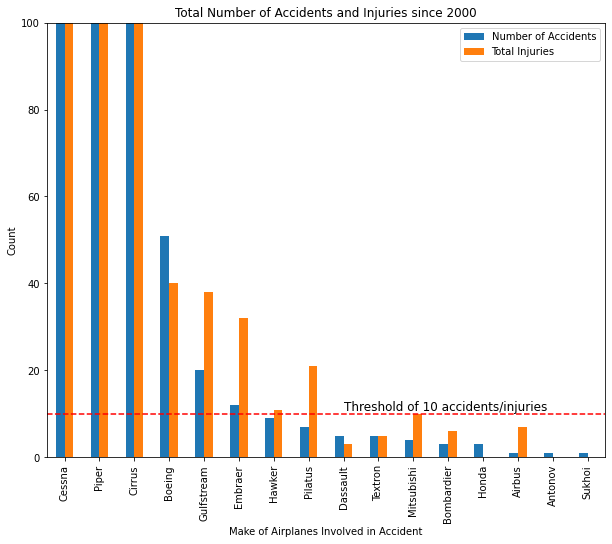

In [40]:
ax = df_accidents_injuries.sort_values(by='Number of Accidents', ascending=False).plot(y=['Number of Accidents', 'Total Injuries'], kind='bar', figsize=(10,8), title='Total Number of Accidents and Injuries since 2000', ylabel='Count', xlabel='Make of Airplanes Involved in Accident')#,logx=True,logy=True)

ax.set_ylim(0,100)
ax.axhline(10, linestyle='--', color='r')
plt.text(8,10.9,'Threshold of 10 accidents/injuries', fontsize='large');

7 companies make the cut (Mitsubish meets the threshold) and they are: Dassault, Textron, Bombardier, Honda, Airbus, Antonov and Sukhoi. Textron Aviation provides airplanes for Cessna, who has a lot of accidents and injuries so we decide to not go along with them too.

Now we work on the time series of makes who made the cut

In [41]:
df_make_cut = pd.read_csv('data/AviationData.csv', encoding='latin1', low_memory='False')
df_make_cut.rename(columns={u:str(u).replace('.', ' ').title() for u in list(df_make_cut.columns)},inplace=True)

<ipython-input-41-9335ba0d18c6>:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_make_cut = pd.read_csv('data/AviationData.csv', encoding='latin1', low_memory='False')


In [42]:
cut_makes = ['Bombardier' , 'Airbus', 'Honda', 'Sukhoi', 'Dassault', 'Antonov']

df_make_cut = df_make_cut[df_make_cut['Make'].isna()==False]
#print(df_make_cut.isna().sum())
display(df_make_cut.loc[df_make_cut['Make'].str.contains('Antonov')])
for make in cut_makes:
    df_make_cut['Make'] = df_make_cut['Make'].str.title()
    df_make_cut['Make'].loc[df_make_cut['Make'].str.contains(make)] = make

df_make_cut = df_make_cut[df_make_cut['Make'].isin(cut_makes)]
df_make_cut = df_make_cut[['Make','Model','Event Date']]
df_make_cut

Empty DataFrame
Columns: [Event Id, Investigation Type, Accident Number, Event Date, Location, Country, Latitude, Longitude, Airport Code, Airport Name, Injury Severity, Aircraft Damage, Aircraft Category, Registration Number, Make, Model, Amateur Built, Number Of Engines, Engine Type, Far Description, Schedule, Purpose Of Flight, Air Carrier, Total Fatal Injuries, Total Serious Injuries, Total Minor Injuries, Total Uninjured, Weather Condition, Broad Phase Of Flight, Report Status, Publication Date]
Index: []

Make           Model  Event Date
149    Dassault       FALCON 20  1982-01-22
6737     Airbus      A-300B4-2C  1983-11-06
7339   Dassault       FALCON 10  1984-01-30
9692   Dassault  FAN JET FALCON  1984-09-07
11630  Dassault       FALCON 50  1985-05-12
...         ...             ...         ...
88789     Honda          HA-420  2022-11-15
88797    Airbus            A320  2022-11-18
88800    Airbus        A320-211  2022-11-19
88867    Airbus       EC 130 T2  2022-12-12
88879    Airbus        A330-243  2022-12-18

[759 rows x 3 columns]

In [43]:
df_make_cut['Date'] = df_make_cut['Event Date'].str[:4]
df_make_cut['Date'].astype({'Date':'int'})
df_make_cut.drop('Event Date',axis=1,inplace=True)
df_make_cut.info()

<class 'pandas.core.frame.DataFrame'>
Index: 759 entries, 149 to 88879
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Make    759 non-null    object
 1   Model   759 non-null    object
 2   Date    759 non-null    object
dtypes: object(3)
memory usage: 23.7+ KB


In [44]:
df_make_cut['Date'] = df_make_cut['Date'].apply(lambda x: int(x.strip()))
df_make_cut.Date.value_counts();

In [45]:
df_make_cut.info()

<class 'pandas.core.frame.DataFrame'>
Index: 759 entries, 149 to 88879
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Make    759 non-null    object
 1   Model   759 non-null    object
 2   Date    759 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 23.7+ KB


In [46]:
df_make_cut.to_csv('data/time_series.csv')

In [47]:
#Preparing the data to the time series
time_series_Airbus = df_make_cut[df_make_cut['Make']=='Airbus'].drop('Make',axis=1).groupby(by=['Date']).count()
time_series_Airbus.rename(columns={'Model':'Airbus'},inplace=True)
time_series_Airbus.reset_index(inplace=True)
time_series_Airbus.sort_values(by='Date', ascending=True, inplace=True)


time_series_Bombardier = df_make_cut[df_make_cut['Make']=='Bombardier'].drop('Make',axis=1).groupby(by=['Date']).count()
time_series_Bombardier.rename(columns={'Model':'Bombardier'},inplace=True)
time_series_Bombardier.reset_index(inplace=True)
time_series_Bombardier.sort_values(by='Date', ascending=True, inplace=True)


time_series_Honda = df_make_cut[df_make_cut['Make']=='Honda'].drop('Make',axis=1).groupby(by=['Date']).count()
time_series_Honda.rename(columns={'Model':'Honda'},inplace=True)
time_series_Honda.reset_index(inplace=True)
time_series_Honda.sort_values(by='Date', ascending=True, inplace=True)


time_series_Sukhoi = df_make_cut[df_make_cut['Make']=='Sukhoi'].drop('Make',axis=1).groupby(by=['Date']).count()
time_series_Sukhoi.rename(columns={'Model':'Sukhoi'},inplace=True)
time_series_Sukhoi.reset_index(inplace=True)
time_series_Sukhoi.sort_values(by='Date', ascending=True, inplace=True)


time_series_Dassault = df_make_cut[df_make_cut['Make']=='Dassault'].drop('Make',axis=1).groupby(by=['Date']).count()
time_series_Dassault.rename(columns={'Model':'Dassault'},inplace=True)
time_series_Dassault.reset_index(inplace=True)
time_series_Dassault.sort_values(by='Date', ascending=True, inplace=True)

time_series_Antonov = df_make_cut[df_make_cut['Make']=='Antonov'].drop('Make',axis=1).groupby(by=['Date']).count()
time_series_Antonov.rename(columns={'Model':'Antonov'},inplace=True)
time_series_Antonov.reset_index(inplace=True)
time_series_Antonov.sort_values(by='Date', ascending=True, inplace=True)


time_series_Dassault.sort_values(by='Date', ascending=True, inplace=True);

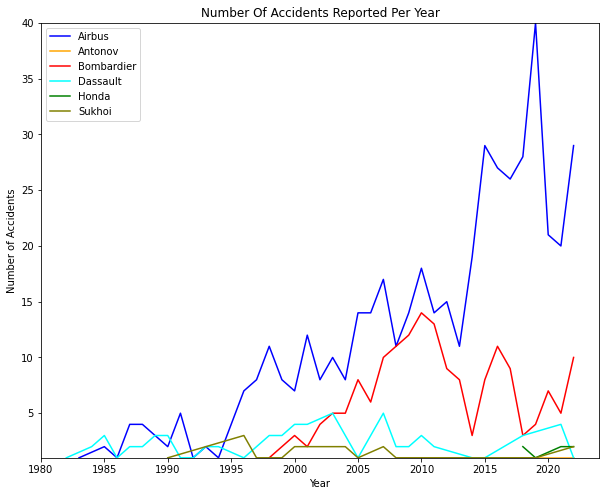

In [48]:
fig,ax = plt.subplots(figsize=(10,8))

# ax.set_xticks(np.arange(1982,2024,4))
ax.plot('Date', 'Airbus', data=time_series_Airbus, color='blue', label='Airbus')
ax.plot('Date', 'Antonov', data=time_series_Antonov, color='orange', label='Antonov')
ax.plot('Date', 'Bombardier', data=time_series_Bombardier, color='red', label='Bombardier')
ax.plot('Date', 'Dassault', data=time_series_Dassault, color='cyan',  label='Dassault')
ax.plot('Date', 'Honda', data=time_series_Honda, color='green', label='Honda')
ax.plot('Date', 'Sukhoi', data=time_series_Sukhoi, color='olive', label='Sukhoi')
ax.set_ylim(1,40)

ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Number of Accidents')
ax.set_title('Number of accidents reported per year'.title());

We notice a sharp increase in the number of accidents since the 2000's started, probably caused by commercial flights becoming more popular. Air bus is the company that has most accidents in those, but it also has a larger share of the market. Honda has almost no accidents but it is a new company in this sector. Other companies are military or Russian and might be embargoed.

## Conclusions

Our analysis leads us to 3 recommendations on the make and models of aircrafts to start our enterprise:
- For a commercial fleet: Airbus A320;
- For a private fleet: Bombardier CL-600-2B16 ;
- For next purchases we can track HC-420 by Honda Aircraft Company as this is a company that just recently joined this market but has not have had a lot of accidents and injuries therefore, we do not possess enough data to make a good decision.

## Next Steps

Further analysis can enrich our decision accuracy on costs of investment and might include:
- Assess long term maintenance cost for each aircraft;
- Look at higher risk airports/locations so these places are avoid alongside with accidents;
- Include weather analysis as some models might have underperfomed in conditions like heavy rain or snow.